In [6]:
# Preprocessing phase.
import pandas as pd
data = pd.read_csv("titanic-passengers.csv",sep =";")
# Head of the Dataset
data.head(2)
#Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.Age.fillna(data.Age.mean(), inplace = True )

In [7]:
data.drop(["Cabin","PassengerId","Name","Ticket","SibSp","Parch"],axis = 1 ,inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,No,2,male,28.0,13.0000,S
1,No,3,male,25.0,7.6500,S
2,No,3,male,20.0,7.8542,S
3,No,3,female,29.0,21.0750,S
4,No,1,male,31.0,52.0000,S


In [9]:
data.Embarked.fillna("S", inplace =True)

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.Survived =encoder.fit_transform(data.Survived)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [12]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 38.4+ KB


In [9]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Fare', 'Age']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.67


C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: x and y must be the same size

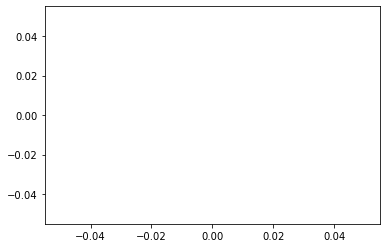

In [14]:
import seaborn as sns
sns.regplot(y_pred,data=data) ###???

<AxesSubplot:xlabel='Age', ylabel='Survived'>

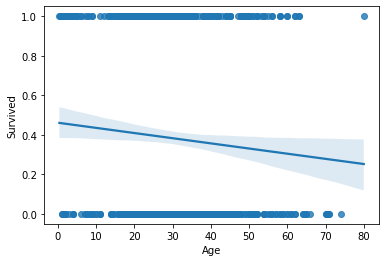

In [18]:
sns.regplot(x='Age',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

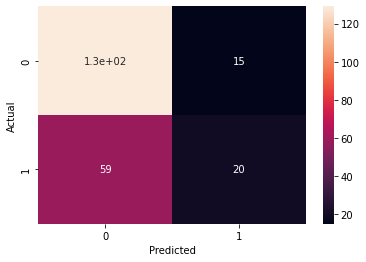

In [19]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       144
           1       0.57      0.25      0.35        79

    accuracy                           0.67       223
   macro avg       0.63      0.57      0.56       223
weighted avg       0.65      0.67      0.63       223



In [1]:
#Reading the dataset
import pandas as pd
data1=pd.read_csv("iris.csv")
data1.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [2]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
#Converting categorical to numerical so we can use knn
data1['variety']=data1['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})

#Choosing the features as x and the target as y
x=data1[['sepal.length','sepal.width','petal.length','petal.width']]
y=data1['variety']
data1.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing

In [6]:
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9666666666666667


In [8]:
# n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.9
Accuracy for k= 2 is: 0.93
Accuracy for k= 3 is: 0.93
Accuracy for k= 4 is: 0.9
Accuracy for k= 5 is: 0.93
Accuracy for k= 6 is: 0.93
Accuracy for k= 7 is: 0.97
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 1.0
Accuracy for k= 10 is: 0.97
Accuracy for k= 11 is: 1.0
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 1.0
Accuracy for k= 15 is: 1.0
Accuracy for k= 16 is: 1.0
Accuracy for k= 17 is: 1.0
Accuracy for k= 18 is: 1.0
Accuracy for k= 19 is: 1.0
Accuracy for k= 20 is: 0.97
Accuracy for k= 21 is: 1.0
Accuracy for k= 22 is: 0.97
Accuracy for k= 23 is: 1.0
Accuracy for k= 24 is: 0.97
Accuracy for k= 25 is: 0.97
Accuracy for k= 26 is: 0.93
Accuracy for k= 27 is: 1.0
Accuracy for k= 28 is: 0.93
Accuracy for k= 29 is: 1.0


In [9]:
scores

[0.9,
 0.93,
 0.93,
 0.9,
 0.93,
 0.93,
 0.97,
 0.97,
 1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 0.97,
 1.0,
 0.97,
 0.97,
 0.93,
 1.0,
 0.93,
 1.0]

Text(0, 0.5, 'Testing Accuracy')

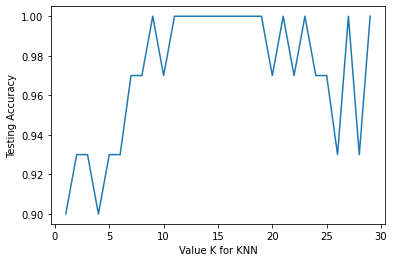

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

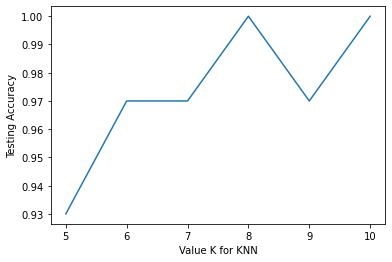

In [15]:
plt.plot(range(5,11),scores[5:11])
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')